
## Relationship between Home & Away Shots on Target per Goal vs Goals Scored

Data: 'Football_Data_Combined.csv' preprocessed 152k matches UK and top European Leagues from the last 20 year. Source:  Football-Data.co.uk


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression
pd.options.mode.chained_assignment = None
plt.style.use('ggplot')
%matplotlib inline

#### Read in prepared CSV file

In [2]:
df = pd.read_csv('C:\\Users\\MikeD\\Documents\\Betting\\Football-Data-Combined\\Leagues_Data_Combined.csv', index_col=[0])


C:\Users\MikeD\AppData\Local\Temp\ipykernel_16180\1175701433.py:1: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('C:\\Users\\MikeD\\Documents\\Betting\\Football-Data-Combined\\Leagues_Data_Combined.csv', index_col=[0])


In [3]:
df

,Div,Date,HomeTeam,AwayTeam,FTHG,FTAG,Referee,HTHG,HTAG,HST,...,TR,HW_%,X_%,AW_%,Ov2.5_%,Un2.5_%,Exp,HG_Exp,AG_Exp,Sup Exp
0,I1,13/08/2022,Milan,Udinese,4.0,2.0,NaN,2.0,2.0,5.0,...,0.0,0.68,0.20,0.12,0.55,0.45,2.89,2.25,0.64,1.61
1,I1,13/08/2022,Sampdoria,Atalanta,0.0,2.0,NaN,0.0,1.0,1.0,...,0.0,0.21,0.24,0.54,0.56,0.44,2.94,0.97,1.94,-0.97
2,I1,13/08/2022,Lecce,Inter,1.0,2.0,NaN,0.0,1.0,4.0,...,0.0,0.09,0.17,0.74,0.60,0.40,3.10,0.54,2.56,-2.02
3,I1,13/08/2022,Monza,Torino,1.0,2.0,NaN,0.0,1.0,4.0,...,0.0,0.37,0.29,0.34,0.46,0.54,2.53,1.30,1.23,0.07
4,I1,14/08/2022,Fiorentina,Cremonese,3.0,2.0,NaN,2.0,1.0,11.0,...,1.0,0.69,0.19,0.12,0.58,0.42,3.03,2.38,0.65,1.73
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
152585,E4,03/05/2003,Macclesfield,Rochdale,3.0,2.0,K Hill,0.0,1.0,3.0,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
152586,E4,03/05/2003,Oxford,York,2.0,0.0,C Penton,1.0,0.0,4.0,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
152587,E4,03/05/2003,Rushden & D,Hartlepool,1.0,1.0,L Cable,1.0,0.0,6.0,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
152588,E4,03/05/2003,Shrewsbury,Scunthorpe,1.0,2.0,S Tomlin,1.0,0.0,5.0,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
df.columns

Index(['Div', 'Date', 'HomeTeam', 'AwayTeam', 'FTHG', 'FTAG', 'Referee',
       'HTHG', 'HTAG', 'HST', 'AST', 'HF', 'AF', 'HC', 'AC', 'HY', 'AY', 'HR',
       'AR', 'TG', 'TST', 'TF', 'TC', 'TY', 'TR', 'HW_%', 'X_%', 'AW_%',
       'Ov2.5_%', 'Un2.5_%', 'Exp', 'HG_Exp', 'AG_Exp', 'Sup Exp'],
      dtype='object')

#### Isolate required columns

In [5]:
df=df[['Div','FTHG','FTAG','HST', 'AST', 'TG', 'TST','Sup Exp']]
df.head()

,Div,FTHG,FTAG,HST,AST,TG,TST,Sup Exp
0,I1,4.0,2.0,5.0,4.0,6.0,9.0,1.61
1,I1,0.0,2.0,1.0,3.0,2.0,4.0,-0.97
2,I1,1.0,2.0,4.0,9.0,3.0,13.0,-2.02
3,I1,1.0,2.0,4.0,6.0,3.0,10.0,0.07
4,I1,3.0,2.0,11.0,4.0,5.0,15.0,1.73


In [6]:
# number of null values
df.isna().sum()

Div         3889
FTHG        3891
FTAG        3891
HST        59437
AST        59434
TG          3891
TST        59437
Sup Exp    23533
dtype: int64

In [7]:
# remove rows with null values
df.dropna(inplace=True)

In [8]:
df.isna().sum()

Div        0
FTHG       0
FTAG       0
HST        0
AST        0
TG         0
TST        0
Sup Exp    0
dtype: int64

In [9]:
df.describe()

,FTHG,FTAG,HST,AST,TG,TST,Sup Exp
count,86641.000000,86641.000000,86641.00000,86641.000000,86641.000000,86641.000000,86641.000000
mean,1.463106,1.160109,5.02605,4.105585,2.623215,9.131635,0.363248
std,1.238914,1.118153,2.72085,2.417322,1.630060,3.623637,0.795669
min,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,-3.160000
25%,1.000000,0.000000,3.00000,2.000000,1.000000,7.000000,-0.050000
50%,1.000000,1.000000,5.00000,4.000000,2.000000,9.000000,0.350000
75%,2.000000,2.000000,7.00000,5.000000,4.000000,11.000000,0.790000
max,10.000000,13.000000,24.00000,23.000000,13.000000,33.000000,3.320000


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 86641 entries, 0 to 150933
Data columns (total 8 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Div      86641 non-null  object 
 1   FTHG     86641 non-null  float64
 2   FTAG     86641 non-null  float64
 3   HST      86641 non-null  float64
 4   AST      86641 non-null  float64
 5   TG       86641 non-null  float64
 6   TST      86641 non-null  float64
 7   Sup Exp  86641 non-null  float64
dtypes: float64(7), object(1)
memory usage: 5.9+ MB


### How does SOT/ goal ratio compare with league standard?

In [11]:
df['Div'].unique().tolist()

['I1',
 'E1',
 'E2',
 'D1',
 'SP1',
 'F1',
 'SC0',
 'SC1',
 'SC2',
 'SC3',
 'N1',
 'D2',
 'P1',
 'SP2',
 'I2',
 'B1',
 'F2',
 'E3',
 'T1',
 'G1',
 'E4']

In [12]:
df_top = df[df['Div'].isin(['E1', 'I1', 'F1', 'D4', 'SP1'])]
df_mid = df[df['Div'].isin(['E2', 'SP2', 'I2', 'F2', 'D2', 'SC0', 'N1','P1','B1','T1','G1'])]
df_low = df[df['Div'].isin(['SC1', 'SC2', 'SC3', 'E1', 'E2'])]

In [13]:
df_top.describe()

,FTHG,FTAG,HST,AST,TG,TST,Sup Exp
count,27023.000000,27023.000000,27023.000000,27023.000000,27023.000000,27023.000000,27023.000000
mean,1.486623,1.140584,5.129556,4.093809,2.627206,9.223365,0.409654
std,1.256276,1.122946,2.786280,2.430449,1.641986,3.615042,0.941159
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-3.110000
25%,1.000000,0.000000,3.000000,2.000000,1.000000,7.000000,-0.100000
50%,1.000000,1.000000,5.000000,4.000000,2.000000,9.000000,0.410000
75%,2.000000,2.000000,7.000000,5.000000,4.000000,11.000000,0.950000
max,9.000000,9.000000,24.000000,20.000000,11.000000,33.000000,3.320000


In [14]:
df_mid.describe()

,FTHG,FTAG,HST,AST,TG,TST,Sup Exp
count,31973.000000,31973.000000,31973.000000,31973.000000,31973.000000,31973.000000,31973.000000
mean,1.444688,1.147249,4.917774,4.029118,2.591937,8.946893,0.349986
std,1.225274,1.110902,2.659387,2.388656,1.619495,3.567738,0.767380
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-3.160000
25%,1.000000,0.000000,3.000000,2.000000,1.000000,6.000000,-0.030000
50%,1.000000,1.000000,5.000000,4.000000,2.000000,9.000000,0.330000
75%,2.000000,2.000000,6.000000,5.000000,4.000000,11.000000,0.750000
max,10.000000,13.000000,21.000000,23.000000,13.000000,30.000000,3.260000


In [15]:
df_low.describe()

,FTHG,FTAG,HST,AST,TG,TST,Sup Exp
count,19682.000000,19682.000000,19682.000000,19682.000000,19682.000000,19682.000000,19682.000000
mean,1.470023,1.165430,5.371050,4.370897,2.635454,9.741947,0.361433
std,1.248195,1.118082,2.994085,2.566591,1.626988,4.004192,0.782124
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-3.020000
25%,1.000000,0.000000,3.000000,3.000000,1.000000,7.000000,-0.050000
50%,1.000000,1.000000,5.000000,4.000000,2.000000,9.000000,0.340000
75%,2.000000,2.000000,7.000000,6.000000,4.000000,12.000000,0.790000
max,9.000000,9.000000,24.000000,20.000000,11.000000,33.000000,3.280000


In [16]:
T_HST_HG = round(df_top['HST'].mean() / df_top['FTHG'].mean(),2)
T_AST_AG = round(df_top['AST'].mean() / df_top['FTAG'].mean(),2)
T_TST_TG = round((df_top['HST'].mean() + df_top['AST'].mean()) / (df_top['FTHG'].mean() + df_top['FTAG'].mean()),2)
print('Top tier HST/HG: ',T_HST_HG)
print('Top tier AST/AG: ',T_AST_AG)
print('Top tier Total ST / Total Goals: ',T_TST_TG)

Top tier HST/HG:  3.45
Top tier AST/AG:  3.59
Top tier Total ST / Total Goals:  3.51


In [17]:
M_HST_HG = round(df_mid['HST'].mean() / df_mid['FTHG'].mean(),2)
M_AST_AG = round(df_mid['AST'].mean() / df_mid['FTAG'].mean(),2)
M_TST_TG = round((df_mid['HST'].mean() + df_mid['AST'].mean()) / (df_mid['FTHG'].mean() + df_mid['FTAG'].mean()),2)
print('Mid tier HST/HG: ',M_HST_HG)
print('Mid tier AST/AG: ',M_AST_AG)
print('Mid tier Total ST / Total Goals: ',M_TST_TG)

Mid tier HST/HG:  3.4
Mid tier AST/AG:  3.51
Mid tier Total ST / Total Goals:  3.45


In [18]:
L_HST_HG = round(df_low['HST'].mean() / df_low['FTHG'].mean(),2)
L_AST_AG = round(df_low['AST'].mean() / df_low['FTAG'].mean(),2)
L_TST_TG = round((df_low['HST'].mean() + df_low['AST'].mean()) / (df_low['FTHG'].mean() + df_low['FTAG'].mean()),2)
print('Mid tier HST/HG: ',L_HST_HG)
print('Mid tier AST/AG: ',L_AST_AG)
print('Mid tier Total ST / Total Goals: ',L_TST_TG)

Mid tier HST/HG:  3.65
Mid tier AST/AG:  3.75
Mid tier Total ST / Total Goals:  3.7


##### No clear trend to suggest lower tier games have higher SOT/gl ratio or higher tier have a lower ratio given that mid tier games show a reduction from top
##### Lower tier does have a 6% higher ratio however than the top two merged averages

#### Column data distribution 

In [19]:
# for i in df.columns:
#     plt.figure(figsize=(10,7))
#     sns.histplot(data=df[i],kde=True,multiple='stack')
#     plt.xticks(rotation=90)
#     plt.show()

##### Distribution of Supremacy - Boxplot

<AxesSubplot:ylabel='Sup Exp'>

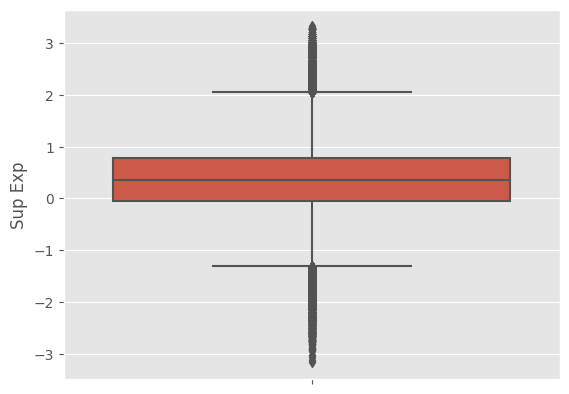

In [20]:
# Box plot of supremacy
sns.boxplot(y=df['Sup Exp'])

##### Distribution of Supremacy - histplot

<AxesSubplot:xlabel='Sup Exp', ylabel='Density'>

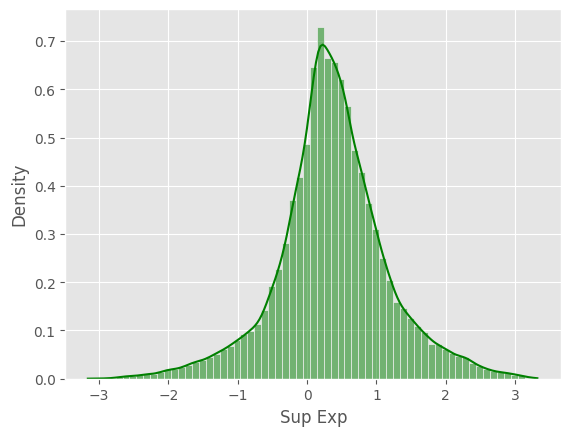

In [21]:
# KDE distribution of supremacy
sns.histplot(data=df['Sup Exp'],fill=True, color='Green',binwidth=0.1,kde=True,stat='density')

##### Distribution of Total Shots on Goal - Histogram

<AxesSubplot:xlabel='TST', ylabel='Count'>

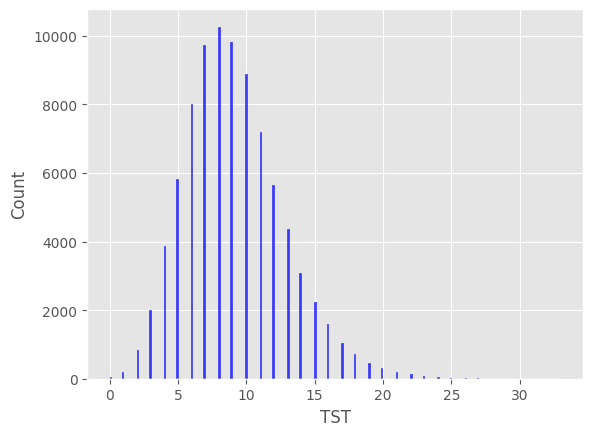

In [22]:
# Hist distribution of TST
sns.histplot(data=df['TST'],fill=True, color='Blue')

##### Distributions of Home/Away Shots - KDE

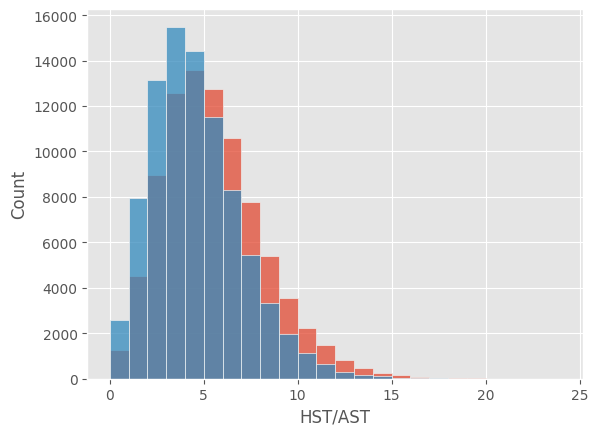

In [23]:
# KDE distribution of HST, AST merged
HGX_AGX = df[['HST','AST']]
for cols in HGX_AGX:
    sns.histplot(HGX_AGX[cols], fill=True, binwidth=1)
    plt.xlabel('HST/AST')

In [24]:
df

,Div,FTHG,FTAG,HST,AST,TG,TST,Sup Exp
0,I1,4.0,2.0,5.0,4.0,6.0,9.0,1.61
1,I1,0.0,2.0,1.0,3.0,2.0,4.0,-0.97
2,I1,1.0,2.0,4.0,9.0,3.0,13.0,-2.02
3,I1,1.0,2.0,4.0,6.0,3.0,10.0,0.07
4,I1,3.0,2.0,11.0,4.0,5.0,15.0,1.73
...,...,...,...,...,...,...,...,...
150929,E4,2.0,3.0,6.0,15.0,5.0,21.0,-0.23
150930,E4,0.0,2.0,7.0,5.0,2.0,12.0,0.64
150931,E4,1.0,2.0,1.0,5.0,3.0,6.0,-0.21
150932,E4,0.0,0.0,7.0,2.0,0.0,9.0,0.26


#### Get the applicable Global SOT stats

In [25]:

Global_Mean_H_SOT_per_HG = df['HST'].mean() / df['FTHG'].mean()
Global_Mean_A_SOT_per_AG = df['AST'].mean() / df['FTAG'].mean()

print('Global Mean SOT per Home team = ', df['HST'].mean())
print('Global Mean SOT per Away team = ', df['AST'].mean())
print('Global Mean Goals per Home team = ', df['FTHG'].mean())
print('Global Mean Goals per Away team = ', df['FTAG'].mean())
print('Global Mean H_SOT/H_Goal = ', Global_Mean_H_SOT_per_HG)
print('Global Mean A_SOT/A_Goal = ', Global_Mean_A_SOT_per_AG)

Global Mean SOT per Home team =  5.0260500225066655
Global Mean SOT per Away team =  4.105585115591925
Global Mean Goals per Home team =  1.463106381505292
Global Mean Goals per Away team =  1.1601089553444675
Global Mean H_SOT/H_Goal =  3.435191101644776
Global Mean A_SOT/A_Goal =  3.5389651089908765


In [26]:
bin_width = 0.05
min_value = -2.5
max_value = 2.5

bins = np.arange(min_value, max_value + bin_width, bin_width)
midpoints = (bins[:-1] + bins[1:]) / 2
labels = [f'{x:.2f}' for x in midpoints]

df['Sup_Bin'] = pd.cut(df['Sup Exp'], bins=bins, labels=labels, right=False, ordered=False)
df['Sup_Bin'] = df['Sup_Bin'].astype('float')
df.reset_index(drop=True)

,Div,FTHG,FTAG,HST,AST,TG,TST,Sup Exp,Sup_Bin
0,I1,4.0,2.0,5.0,4.0,6.0,9.0,1.61,1.62
1,I1,0.0,2.0,1.0,3.0,2.0,4.0,-0.97,-0.98
2,I1,1.0,2.0,4.0,9.0,3.0,13.0,-2.02,-2.03
3,I1,1.0,2.0,4.0,6.0,3.0,10.0,0.07,0.07
4,I1,3.0,2.0,11.0,4.0,5.0,15.0,1.73,1.72
...,...,...,...,...,...,...,...,...,...
86636,E4,2.0,3.0,6.0,15.0,5.0,21.0,-0.23,-0.23
86637,E4,0.0,2.0,7.0,5.0,2.0,12.0,0.64,0.62
86638,E4,1.0,2.0,1.0,5.0,3.0,6.0,-0.21,-0.23
86639,E4,0.0,0.0,7.0,2.0,0.0,9.0,0.26,0.27


<AxesSubplot:>

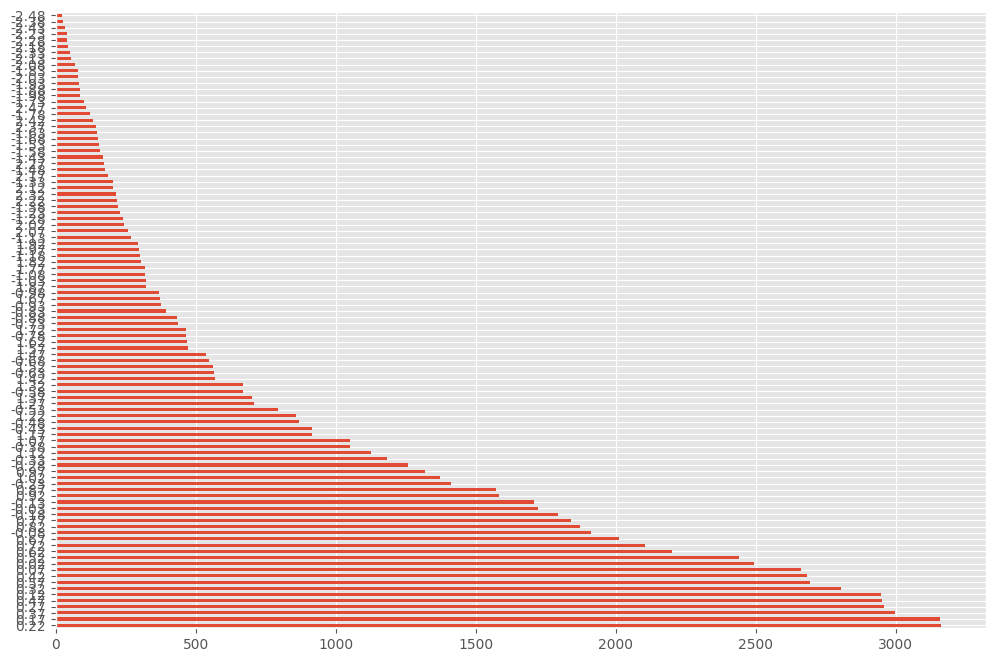

In [27]:
df['Sup_Bin'].value_counts().plot(kind='barh',figsize=(12,8))

In [28]:

df['Avg_HST'] = round(df.groupby('Sup_Bin')['HST'].transform('mean'),2)
df['Avg_AST'] = round(df.groupby('Sup_Bin')['AST'].transform('mean'),2)
df['Avg_HG'] = round(df.groupby('Sup_Bin')['FTHG'].transform('mean'),2)
df['Avg_AG'] = round(df.groupby('Sup_Bin')['FTAG'].transform('mean'),2)
df['HST/HG'] = round(df['Avg_HST'] / df['Avg_HG'],2)
df['AST/AG'] = round(df['Avg_AST'] / df['Avg_AG'],2)
x = df['HST/HG'].mean()
y = df['AST/AG'].mean()     
df['%_fr_Av_HST/HG'] = round(df['HST/HG'] / x ,2)
df['%_fr_Av_AST/AG'] = round(df['AST/AG'] / y ,2)

df.reset_index(drop=True, inplace=True)
df

,Div,FTHG,FTAG,HST,AST,TG,TST,Sup Exp,Sup_Bin,Avg_HST,Avg_AST,Avg_HG,Avg_AG,HST/HG,AST/AG,%_fr_Av_HST/HG,%_fr_Av_AST/AG
0,I1,4.0,2.0,5.0,4.0,6.0,9.0,1.61,1.62,6.90,3.18,2.25,0.76,3.07,4.18,0.88,1.16
1,I1,0.0,2.0,1.0,3.0,2.0,4.0,-0.97,-0.98,3.65,5.69,0.93,1.77,3.92,3.21,1.12,0.89
2,I1,1.0,2.0,4.0,9.0,3.0,13.0,-2.02,-2.03,3.30,6.84,0.72,2.22,4.58,3.08,1.31,0.85
3,I1,1.0,2.0,4.0,6.0,3.0,10.0,0.07,0.07,4.54,4.32,1.23,1.20,3.69,3.60,1.05,1.00
4,I1,3.0,2.0,11.0,4.0,5.0,15.0,1.73,1.72,6.86,3.22,2.22,0.79,3.09,4.08,0.88,1.13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
86636,E4,2.0,3.0,6.0,15.0,5.0,21.0,-0.23,-0.23,4.25,4.64,1.12,1.39,3.79,3.34,1.08,0.92
86637,E4,0.0,2.0,7.0,5.0,2.0,12.0,0.64,0.62,5.21,3.77,1.53,1.04,3.41,3.62,0.97,1.00
86638,E4,1.0,2.0,1.0,5.0,3.0,6.0,-0.21,-0.23,4.25,4.64,1.12,1.39,3.79,3.34,1.08,0.92
86639,E4,0.0,0.0,7.0,2.0,0.0,9.0,0.26,0.27,4.84,4.08,1.36,1.14,3.56,3.58,1.02,0.99


<AxesSubplot:xlabel='Avg_HG', ylabel='HST/HG'>

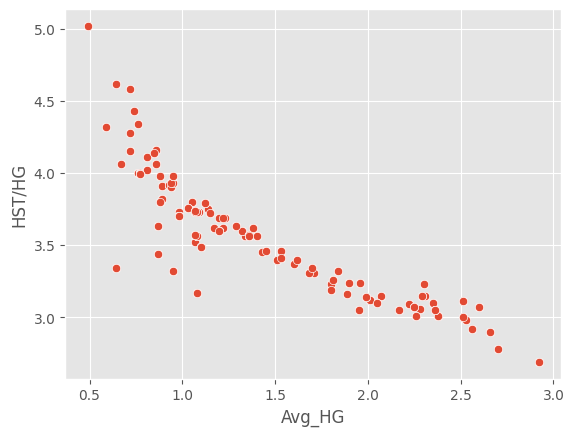

In [29]:
sns.scatterplot(data=df,x='Avg_HG',y='HST/HG')


<AxesSubplot:xlabel='Avg_AG', ylabel='AST/AG'>

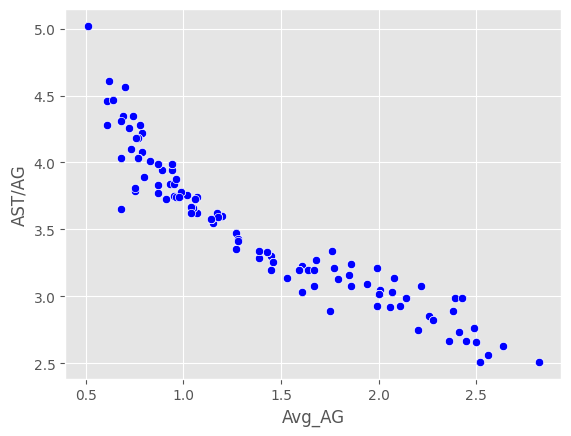

In [30]:
sns.scatterplot(data=df,x='Avg_AG',y='AST/AG', color='blue')

In [31]:
print('Mean HST/HG: ',round(df['HST/HG'].mean(),2))
print('Mean AST/AG: ',round(df['AST/AG'].mean(),2))

Mean HST/HG:  3.5
Mean AST/AG:  3.62


#### Relationship Looks non linear, do a polynomial fit

In [32]:
df.isna().sum()

Div                 0
FTHG                0
FTAG                0
HST                 0
AST                 0
TG                  0
TST                 0
Sup Exp             0
Sup_Bin           919
Avg_HST           919
Avg_AST           919
Avg_HG            919
Avg_AG            919
HST/HG            919
AST/AG            919
%_fr_Av_HST/HG    919
%_fr_Av_AST/AG    919
dtype: int64

In [33]:
# prior to poly transform, first remove any infinite values from 0 division
df.isna().sum()

Div                 0
FTHG                0
FTAG                0
HST                 0
AST                 0
TG                  0
TST                 0
Sup Exp             0
Sup_Bin           919
Avg_HST           919
Avg_AST           919
Avg_HG            919
Avg_AG            919
HST/HG            919
AST/AG            919
%_fr_Av_HST/HG    919
%_fr_Av_AST/AG    919
dtype: int64

In [34]:
df.dropna(inplace=True)
df.isna().sum()

Div               0
FTHG              0
FTAG              0
HST               0
AST               0
TG                0
TST               0
Sup Exp           0
Sup_Bin           0
Avg_HST           0
Avg_AST           0
Avg_HG            0
Avg_AG            0
HST/HG            0
AST/AG            0
%_fr_Av_HST/HG    0
%_fr_Av_AST/AG    0
dtype: int64

          3          2
-0.01215 x + 0.1184 x - 0.4585 x + 1.445


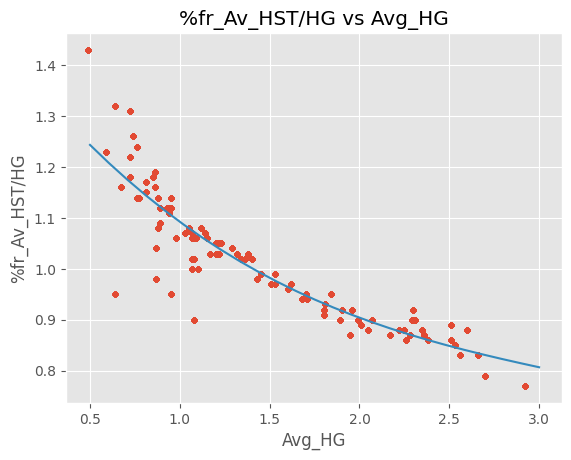

In [35]:
def PlotPolly(model, ind_var, dep_var, Name):
    x_new = np.linspace(0.5,3,25)
    y_new = model(x_new)
    
    plt.plot(ind_var, dep_var, '.', x_new, y_new, '-')
    plt.title('%fr_Av_HST/HG vs Avg_HG')
    ax = plt.gca()
    ax.set_facecolor((0.898,0.898, 0.898))
    fig = plt.gcf()
    plt.xlabel('Avg_HG')
    plt.ylabel('%fr_Av_HST/HG')
    
    plt.show()
    plt.close()
    
x_h = df['Avg_HG']
y_h = df['%_fr_Av_HST/HG']

# declare poly degree
degree = 3

f_h = np.polyfit(x_h,y_h,degree)
p_h = np.poly1d(f_h)
print(p_h)

# lets visualize this by by parsing the 'PlotPolly' function 
PlotPolly(p_h,x_h,y_h,'%_fr_Av_HST/HG')

          3          2
-0.08376 x + 0.5067 x - 1.145 x + 1.76


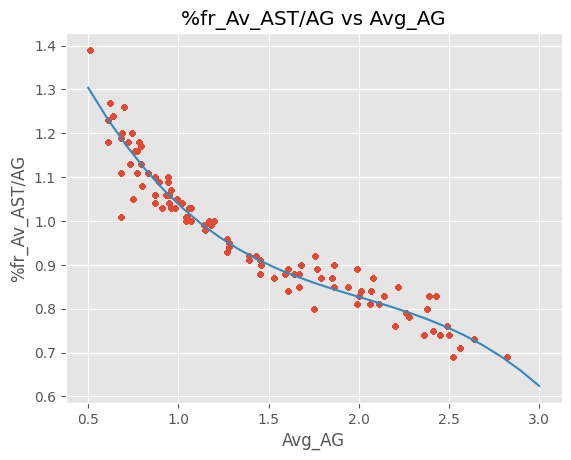

In [42]:
def PlotPolly(model, ind_var, dep_var, Name):
    x_new = np.linspace(0.5,3,25)
    y_new = model(x_new)
    
    plt.plot(ind_var, dep_var, '.', x_new, y_new, '-')
    plt.title('%fr_Av_AST/AG vs Avg_AG')
    ax = plt.gca()
    ax.set_facecolor((0.898,0.898, 0.898))
    fig = plt.gcf()
    plt.xlabel('Avg_AG')
    plt.ylabel('%fr_Av_AST/AG')
    
    plt.show()
    plt.close()
    
x_a = df['Avg_AG']
y_a = df['%_fr_Av_AST/AG']

# declare poly degree
degree = 3

f_a = np.polyfit(x_a,y_a,degree)
p_a = np.poly1d(f_a)
print(p_a)

# lets visualize this by by parsing the 'PlotPolly' function 
PlotPolly(p_a,x_a,y_a,'%_fr_Av_AST/AG')

#### Conclusion:
 - The rate of home shots on target per home goal decreases non-linearly as expected home goals increase. So the more home goals expected results in fewer shots on target for every goal that is scored. This relationship can be summarized with the formula:
     
y = -0.0122 x^3 + 0.118 x^2 + 0.459 x + 1.445     [y = percentage from average HST per home goal scored, x = home goals expected]

 - The rate of away shots on target per away goal decreases non-linearly as expected away goals increase. So the more away goals expected results in fewer shots on target for every goal that is scored. This relationship can be summarized with the formula:
          
y = -0.084 x^3 + 0.507 x^2 + 1.145 x + 1.76       [y = percentage from average AST per away goal scored, x = away goals expected]


### _________________________________________________________________________________________________